<br>
<br>
<center> <font size = 6> Valuation of Swaps (Monte Carlo Simulation)
         </font> 
</center>
<br>
<br>
<center> <font size = 3> Last Updated: 12/04-2023 </font> </center>

We start by loading our SDE-simulation tool and other packages.

In [2]:
from IPython.display import display, Latex
from SimulatorSDE import *
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm

### Definition of Model

The Vasicek model for short rates has the following form:

$$
dr(t) = k(\theta - r(t))dt + \sigma dW(t)
$$

It can be shown using Itô's lemma that

$$
r(t) = r(s)e^{-k(t-s)} + \theta(1 - e^{-k(t-s)}) + \sigma \int_{s}^{t} e^{-k(t-u)} dW(u)
$$

Let ($\Omega, \mathcal{F}_{t}, \{\mathcal{F}_{t}\}, \mathbb{P}$) be a filtered probability space. We say that 

$$
    X(t) = X(0) + \int_{0}^{t}F(X(s), s)ds + \int_{0}^{t}G(X(s), s)dW(s)
$$

is an $\mathcal{L}_{2}$ Îto process, provided that the initial condition $X_{0}$ is $\mathcal{F}_{0}$-measurable, and that $\{F_{t}\}$ and $\{G_{t}\}$ are adapted and have left-continuous sample paths and locally integrable variance.

Let $Y_{t} = h(X_{t}, t)$ be a function that is twice differentiable wrt. x and once differentiable wrt. t. Then Itô's lemma states that

$$
     dY_{t} = (\frac{dh}{dt}(x,t) + \frac{dh}{dx}(x,t) \cdot F(x,t) + \frac{1}{2}\frac{d^{2}h}{dx^{2}}(x,t) \cdot G(x,t)^{2}) + \frac{dh}{dx}(x,t) \cdot G(x,t) \cdot dW_{t}
$$

Hence, the Vasicek solution can be verified by finding the equation from the solution.

The drift is state-dependent, and the diffusion is state-independent. We have shown that

$$
\begin{align}
    \mathbb{E}[r(t+\Delta t) | r(t)] &= e^{-\kappa \Delta t}r_{t} + \theta (1 - e^{-\kappa \Delta t}) \\
    \mathbb{V}[r(t+\Delta t) | r(t)] &= \frac{\sigma^{2}}{2 \kappa} (1 - e^{-2\kappa \Delta t})
\end{align}
$$

The conditional expectation is reaily seen from the solution. The variance is found using Itô Isometry (part of the reason why Itô's formulation of stochastic calculus is so widely spread).

$$
\mathbb{E}[|\int_{S}^{T} G_{t} dB_{t}|^{2}] = \int_{S}^{T} \mathbb{E}[G_{t}^{2}]dt
$$

Then we can try it on the solution.

$$
\begin{align}
\mathbb{V}[r(t) | r(s)] &= \sigma^{2} \mathbb{V}[\int_{s}^{t} e^{-k(t-u)} dW(u)]\\
&= \sigma^{2} \mathbb{E}[|\int_{s}^{t} e^{-k(t-u)} dW(u)|^{2}] \\
&= \sigma^{2} \int_{s}^{t} \mathbb{E}[e^{-2k(t-u)}] du \\
&= \sigma^{2} e^{-2kt} \int_{s}^{t} e^{2ku} du \\
&= \sigma^{2} e^{-2kt} [\frac{1}{2k}e^{2ku}]_{s}^{t} \\
&= \sigma^{2} e^{-2kt} \frac{1}{2k}[e^{2kt} - e^{2ks}] \\
&= \sigma^{2} \frac{1}{2k}[1 - e^{2k(s-t)}] \\
&= \frac{\sigma^{2}}{2k}[1 - e^{-2k(t-s)}] \\
\end{align}
$$

Hence, conditional on some state $r(t)$ we can estimate the optimal prediction. Therefore, we displace the observations 1 lag apart and do a regression analysis.

### Model Calibration

Insert the relevant group nr.

In [3]:
group = 1

We load the data used for the project.

In [4]:
shortRatesData = pd.read_excel('./data/ShortRates.xlsx')

In [5]:
delta_t = shortRatesData['Time'].values[1] - shortRatesData['Time'].values[0]

In [6]:
selectedGroup = "Group {}".format(group)
selectedData = shortRatesData[selectedGroup]
regr = LinearRegression(fit_intercept=True)

In [7]:
X = np.array(selectedData.iloc[:-1]).reshape(-1, 1)
Y = np.array(selectedData.iloc[1:]).reshape(-1, 1)
regr.fit(X, Y);

Let's explore the regression model.

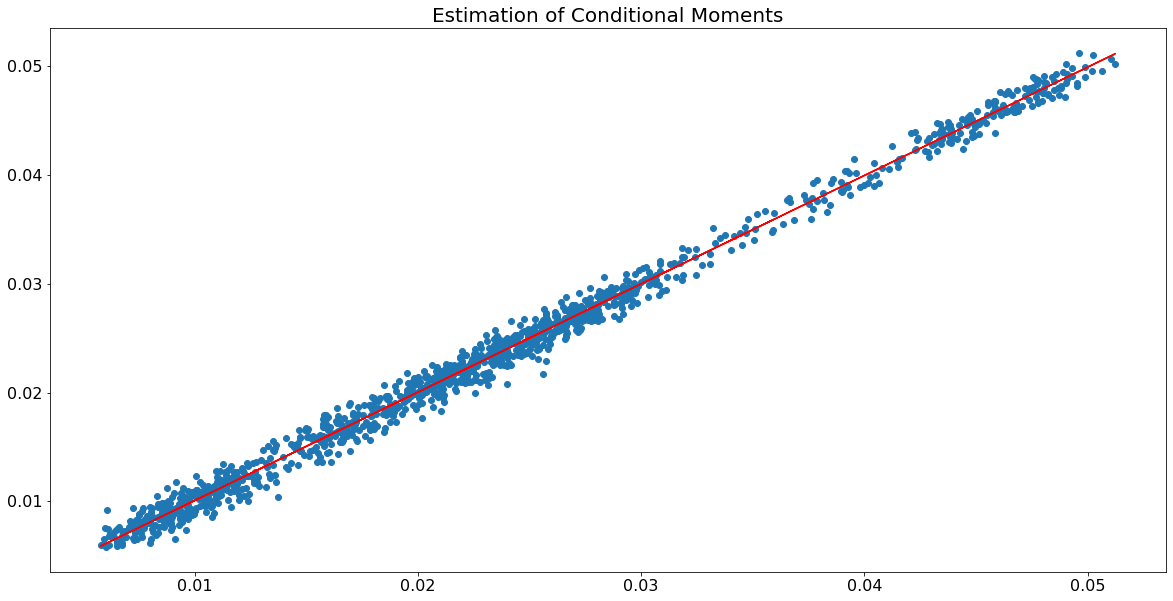

In [8]:
SMALL_SIZE = 16
MEDIUM_SIZE = 12
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize = (20,10));
plt.title(r'Estimation of Conditional Moments', fontsize = BIGGER_SIZE)
plt.scatter(X,Y);
plt.plot(X,regr.predict(X), color = 'red');
plt.show()

Then we will explore the residuals.

In [9]:
residuals = regr.predict(X) - Y

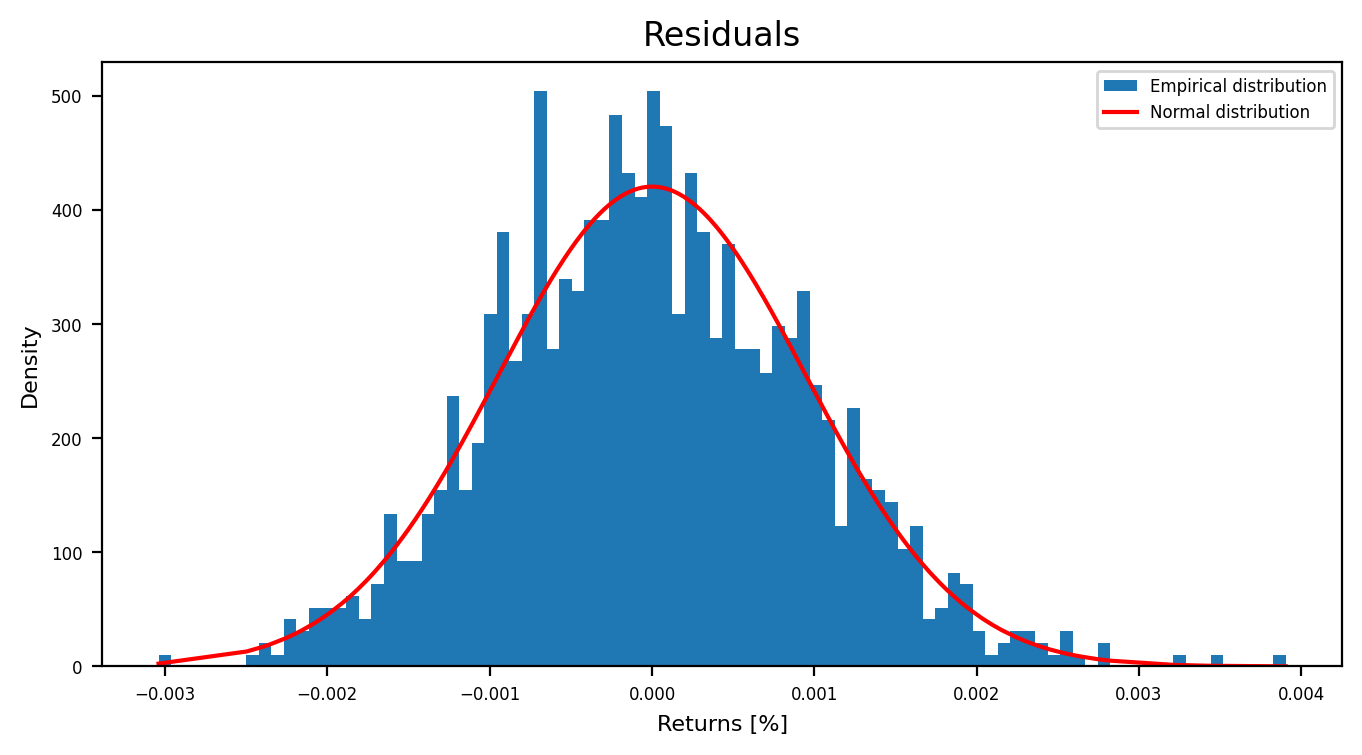

In [10]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,4), dpi=200)
plt.hist(residuals, bins = 90, density = True, label = "Empirical distribution")
plt.plot(np.sort(residuals, axis = 0), sps.norm.pdf(np.sort(residuals, axis = 0), loc=np.mean(residuals), scale=np.std(residuals)), color = 'red', label = "Normal distribution")
plt.xlabel("Returns [%]")
plt.ylabel("Density")
plt.title("Residuals")
plt.legend()
plt.show()

They seem approximately normally distributed. Then we estimate the parameters.

In [11]:
slope = regr.coef_[0,0]
intercept = regr.intercept_[0]
SE = np.std(residuals)

In [12]:
display(Latex(f'The estimated model is as follows:\n'))
display(Latex(f'$\u03B2_{0}$: %s' % intercept))
display(Latex(f'$\u03B2_{1}$: %s' % slope))
display(Latex(f'S.E.: %s' % SE))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can use these to calculate the parameters. From the conditional moments, it is clear that

$$
\begin{align}
    \hat \beta_{0} &= \theta (1 - e^{-\kappa \Delta t}) \\
    \hat \beta_{1} &=  e^{-\kappa \Delta t}
\end{align}
$$

Therefore,

$$
\begin{align}
\hat \kappa &= \frac{\ln (\hat \beta_{1})}{-\Delta t} \\
\hat \theta &= \frac{\hat \beta_{0}}{1 - e^{-\hat \kappa \Delta t}} \\
\hat \sigma &= \frac{\hat \sigma_{\epsilon}}{\sqrt{\frac{1 - e^{-2 \kappa \Delta t}}{2\kappa}}}
\end{align}
$$

In [13]:
kappa = np.log(slope)/(-delta_t)
theta = intercept/(1 - np.exp(-kappa*delta_t))
sigma = SE/(np.sqrt((1 - np.exp(-2*kappa*delta_t))/(2*kappa)))

In [14]:
kappa, theta, sigma

(0.928114148071048, 0.02891525200553336, 0.015079919875277932)

To confirm that our results hold, we can try to simulate from a process and use this to estimate the parameters.

In [15]:
S = 1000
T = 5
X0 = selectedData[0]

kappaArray = np.zeros(S)
thetaArray = np.zeros(S)
sigmaArray = np.zeros(S)

shortRatesSimulated = Vasicek(k = kappa, theta = theta, delta_t = delta_t, sigma = sigma, n_sim = S, plot = False, tN = T, X_0 = X0)

for s in range(0,S):
    
    regr_sim = LinearRegression(fit_intercept=True)
    X_sim = np.array(shortRatesSimulated['Simulation {}'.format(s+1)].iloc[:-1]).reshape(-1, 1)
    Y_sim = np.array(shortRatesSimulated['Simulation {}'.format(s+1)].iloc[1:]).reshape(-1, 1)
    regr_sim.fit(X_sim, Y_sim);
    residuals_sim = regr_sim.predict(X_sim) - Y_sim
    slope_sim = regr_sim.coef_[0,0]
    intercept_sim = regr_sim.intercept_[0]
    SE_sim = np.std(residuals_sim, ddof=1)
    kappaArray[s] = np.log(slope_sim)/(-delta_t)
    thetaArray[s] = intercept_sim/(1 - np.exp(-kappaArray[s]*delta_t))
    sigmaArray[s] = SE_sim/(np.sqrt((1 - np.exp(-2*kappaArray[s]*delta_t))/(2*kappaArray[s])))
    

Numerical Integration: 100%|████████| 1260/1260 [00:00<00:00, 82170.92it/s]


Then we fit a Gamma distribution and plot the results.

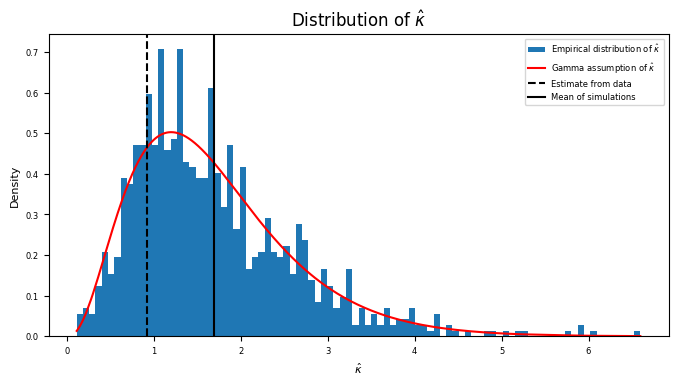

In [16]:
fit_alpha, fit_loc, fit_beta = sps.gamma.fit(kappaArray)

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,4), dpi=100)
plt.hist(kappaArray, bins = 90, density = True, label = r'Empirical distribution of $\hat \kappa$')
plt.plot(np.sort(kappaArray, axis = 0), sps.gamma.pdf(np.sort(kappaArray, axis = 0), fit_alpha, loc=fit_loc, scale=fit_beta), color = 'red', label = r'Gamma assumption of $\hat \kappa$')
plt.axvline(x = kappa, linestyle = '--', color = 'black', label = 'Estimate from data')
plt.axvline(x = np.mean(kappaArray), linestyle = '-', color = 'black', label = 'Mean of simulations')
plt.xlabel(r'$\hat \kappa$')
plt.ylabel("Density")
plt.title(r'Distribution of $\hat \kappa$')
plt.legend()
plt.show()

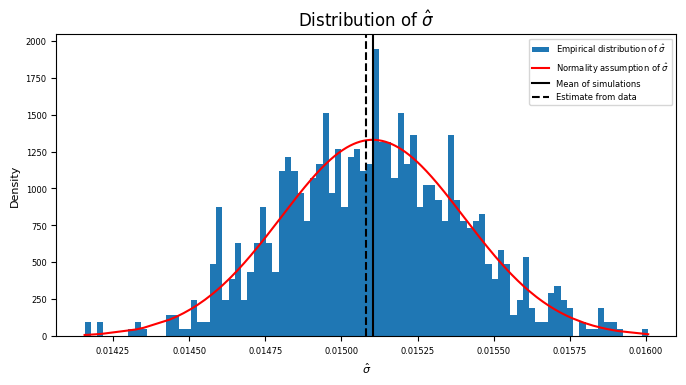

In [17]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,4), dpi=100)
plt.hist(sigmaArray, bins = 90, density = True, label = r'Empirical distribution of $\hat \sigma$')
plt.plot(np.sort(sigmaArray, axis = 0), sps.norm.pdf(np.sort(sigmaArray, axis = 0), loc=np.mean(sigmaArray), scale=np.std(sigmaArray, ddof=1)), color = 'red', label = r'Normality assumption of $\hat \sigma$')
plt.axvline(x = np.mean(sigmaArray), linestyle = '-', color = 'black', label = 'Mean of simulations')
plt.axvline(x = sigma, linestyle = '--', color = 'black', label = 'Estimate from data')
plt.xlabel(r'$\hat \sigma$')
plt.ylabel("Density")
plt.title(r'Distribution of $\hat \sigma$')
plt.legend()
plt.show()

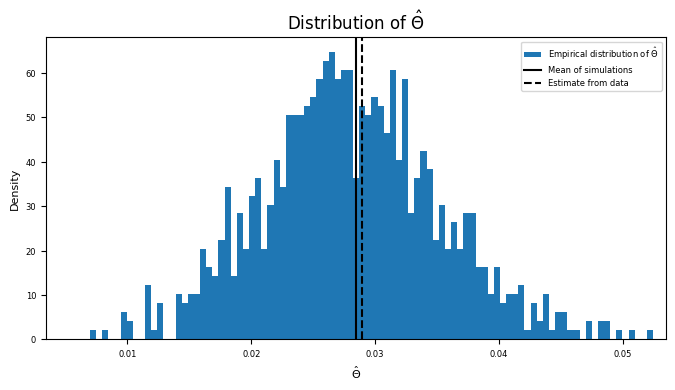

In [18]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,4), dpi=100)
plt.hist(thetaArray, bins = 200, density = True, label = r'Empirical distribution of $\hat \Theta$')
plt.axvline(x = np.mean(thetaArray), linestyle = '-', color = 'black', label = 'Mean of simulations')
plt.axvline(x = theta, linestyle = '--', color = 'black', label = 'Estimate from data')
plt.xlabel(r'$\hat \Theta$')
plt.ylabel("Density")
plt.title(r'Distribution of $\hat \Theta$')
plt.xlim([np.mean(thetaArray) - np.std(thetaArray)*3, np.mean(thetaArray) + 3*np.std(thetaArray)])
#plt.ylim(0,1)
plt.legend()
plt.show()

## Valuation of Swaps

We start by defining a class that resembles an interest rate swap.

In [19]:
def B (t, T, k):
    return((1 - np.exp(-k*(T-t)))/k)

def A(t, T, k, theta, sigma):
    return(np.exp((theta - (sigma**2)/(2*(k**2))) * (B(t, T, k) - T + t) - ((sigma**2)/(4*k))*(B(t,T,k)**2)))

def P(t, T, r, k, theta, sigma):
    return(A(t,T,k,theta,sigma)*np.exp(-r*B(t,T,k)))

In [73]:
class InterestRateSwap:
    
    def __init__(self, notional = 1, swapRate = 0.02, fitSwapRate = True, params = {'kappa':1,'theta':0.03,'sigma':0.015}, receive = 'FIXED'):
        
        self.notional = notional;
        self.validReceives = np.array(['FIXED', 'FLOAT']);
        self.direction = -1;
        self.swapRate = swapRate;
        self.fitSwapRate = fitSwapRate;
        
        # The parameters come from the Vasicek model
        self.params = params;
        
        if receive in self.validReceives:
            print("Your swap has been successfully initiated!")
            self.direction = 1 if receive == 'FIXED' else -1
            
        else:
            print("Please provide on of the following options: \n\n1) 'FIXED' is you receive fixed and pay floating \n2) 'FLOAT' is you receive floating and pay fixed")
            
    def termSheet(self):
        
        print("\n------ Term Sheet for Interest Rate Swap ------")
        print("\n\nNotional: ${}".format(self.notional))
        print("\nSwap rate: {}%".format(round(self.swapRate*100,3)))
        if self.direction == 1:
            print("\nDirection: You are receiving a fixed rate and paying a floating rate.")
        else:
            print("\nDirection: You are receiving a floating rate and paying a fixed rate.")
        print("\n\n")
       
    def simulateMtM(self, initialShortRate = 0.02, stepSize = 0.25, maturity = 10, totalSimulations = 10):
        
        # The number of time points (0 through T/delta_t)
        n = int(maturity/stepSize + 1)
        
        # Time grid
        timeGrid = np.linspace(0,maturity,n)
        
        # Placeholders for values of each direction
        floatingLeg = np.zeros((n,totalSimulations))
        fixedLeg = np.zeros((n,totalSimulations))
        swapMtM = np.zeros((n,totalSimulations))
        
        # Simulate the spot rates (Euler-Maruyama)
        r = Vasicek(k = self.params['kappa'], theta = self.params['theta'], sigma = self.params['sigma'], tN = maturity, t0 = 0, delta_t = stepSize, X_0 = initialShortRate, n_sim = totalSimulations)
        r = r.drop(['Time'], axis=1)
        r = r.to_numpy()
        
        # Compute the exposure at each step
        for m in tqdm (range(totalSimulations), desc="Computing MtM", ascii=False, ncols=75):
            
            # Make discount factors ready to value each leg of the swap
            ZCB = np.full([n, n], np.nan)           
            
            # We stand in t (index i), and want to discount a cash flow at time T (index j).
            # This can be done more concisely, but for the sake of clarify we make a double for-loop.
            for (i, t) in enumerate(timeGrid):  
                for (j, T) in enumerate(timeGrid[i:]):
                    ZCB[i,i+j] = P(t, T, r[i,m], self.params['kappa'], self.params['theta'], self.params['sigma'])
            
            # Set swap rate if needed
            if m == 0 and self.fitSwapRate:
                self.swapRate = (1 - ZCB[0,-1])/(np.nansum(ZCB[0,1:])*stepSize)
            
            # The swapRate is multiplied with the stepSize as the swapRate is on annual basis!
            # The function np.nansum(-, axis = 1) sums over each row.
            # We subtract one because no cash flows are exchanged at time 0.
            fixedLeg[:,m] = self.swapRate*stepSize*(np.nansum(ZCB, axis = 1) - 1);
            
            # The last column in all rows contain the bond price at a starting time given by the timeGrid[row index]
            # with maturity at the specified time. 
            floatingLeg[:,m] = 1 - ZCB[:,-1];
            
            # Then we calculate the swapMtM. The direction depends on the specified in the swap object.
            swapMtM[:,m] = self.notional * self.direction * (fixedLeg[:,m] - floatingLeg[:,m])
        
        return swapMtM
    
    def EE(self, quantile = 0.975, initialShortRate = 0.02, stepSize = 0.25, maturity = 10, totalSimulations = 10):
        
        swapMtM = self.simulateMtM(initialShortRate = initialShortRate, stepSize = stepSize, maturity = maturity, totalSimulations = totalSimulations);
        exposure = swapMtM.copy()
        exposure[exposure < 0] = 0;
        swapEE = np.mean(exposure, axis = 1);
        swapPE = np.quantile(exposure, quantile, axis = 1)
        swapMaxPE = np.max(swapPE)
        maxColumnIndex = stepSize*np.argmax(swapPE)
        
        return swapMtM, swapEE, swapPE, (swapMaxPE, maxColumnIndex)
        
        

In [74]:
numberSimulations = 1000
quantileNumber = 0.975
initialRate = selectedData.iloc[-1]

params = {'kappa':kappa,'theta':theta,'sigma':sigma}

FixedForFloat10Y = InterestRateSwap(notional = 2*10**6, fitSwapRate = False, params = params, swapRate = 0.02, receive = 'FLOAT');
FixedForFloat7Y = InterestRateSwap(notional = 8*10**6, fitSwapRate = True, params = params, receive = 'FLOAT');
FixedForFloat4Y = InterestRateSwap(notional = 4*10**6, fitSwapRate = False, params = params, swapRate = 0.03, receive = 'FIXED');

swapMtM10Y, swapEE10Y, swapPE10Y, (swapMax10Y, index10Y) = FixedForFloat10Y.EE(quantile = quantileNumber, initialShortRate = initialRate, stepSize = 0.25, maturity = 10, totalSimulations = numberSimulations);
swapMtM7Y, swapEE7Y, swapPE7Y, (swapMax7Y, index7Y) = FixedForFloat7Y.EE(quantile = quantileNumber, initialShortRate = initialRate, stepSize = 0.25, maturity = 7, totalSimulations = numberSimulations);
swapMtM4Y, swapEE4Y, swapPE4Y, (swapMax4Y, index4Y) = FixedForFloat4Y.EE(quantile = quantileNumber, initialShortRate = initialRate, stepSize = 0.25, maturity = 4, totalSimulations = numberSimulations);



Your swap has been successfully initiated!
Your swap has been successfully initiated!
Your swap has been successfully initiated!


Computing MtM: 100%|██████████████████| 1000/1000 [00:01<00:00, 859.58it/s]


### Plotting Expected Exposure (EE)

Then we can prepare the appropriate plots.

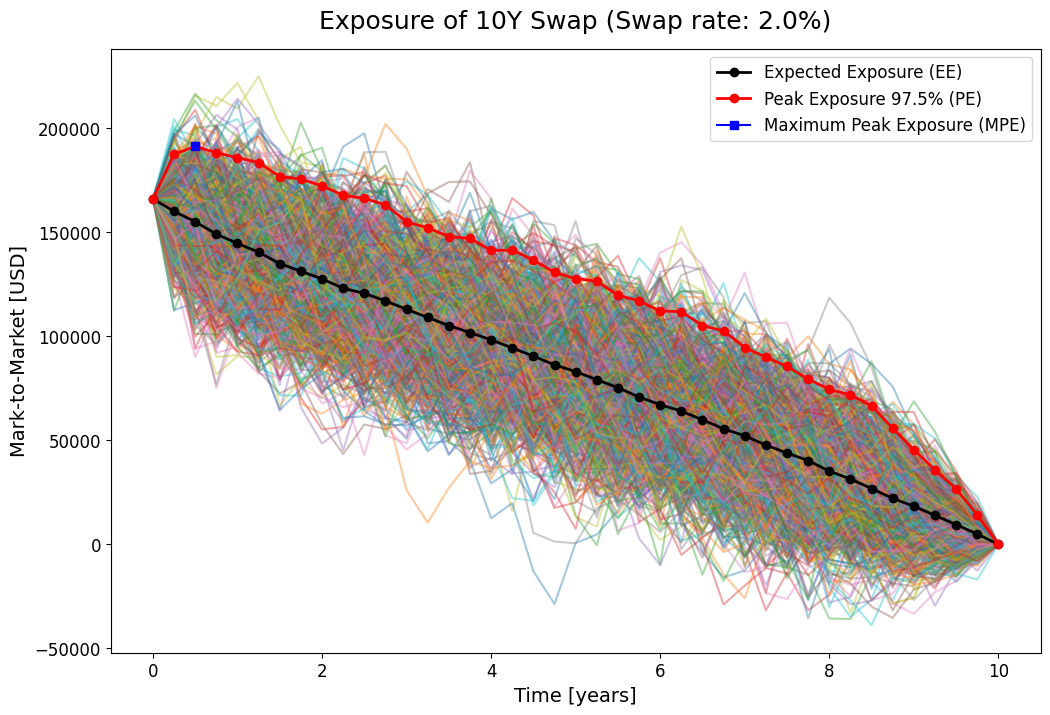

In [75]:
# Make an array for the time grid
maturity = 10
stepSize = 0.25

timeGrid = np.linspace(0,maturity,int(maturity/stepSize + 1))

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=(12,8), dpi=100)
plt.plot(timeGrid, swapMtM10Y, alpha=0.4)
plt.plot(timeGrid, swapEE10Y, color = 'black', linewidth = 2, linestyle = '-', marker='o', label = "Expected Exposure (EE)")
plt.plot(timeGrid, swapPE10Y, color = 'red', linewidth = 2, linestyle = '-', marker='o', label = "Peak Exposure {}% (PE)".format(round(quantileNumber*100, 1)))
plt.plot(index10Y, swapMax10Y, color = 'blue', marker = "s", label = "Maximum Peak Exposure (MPE)")
plt.xlabel('Time [years]')
plt.ylabel("Mark-to-Market [USD]")
plt.title(r'Exposure of 10Y Swap (Swap rate: {}%)'.format(round(FixedForFloat10Y.swapRate*100,3)), y=1.02)
plt.legend()
plt.show()

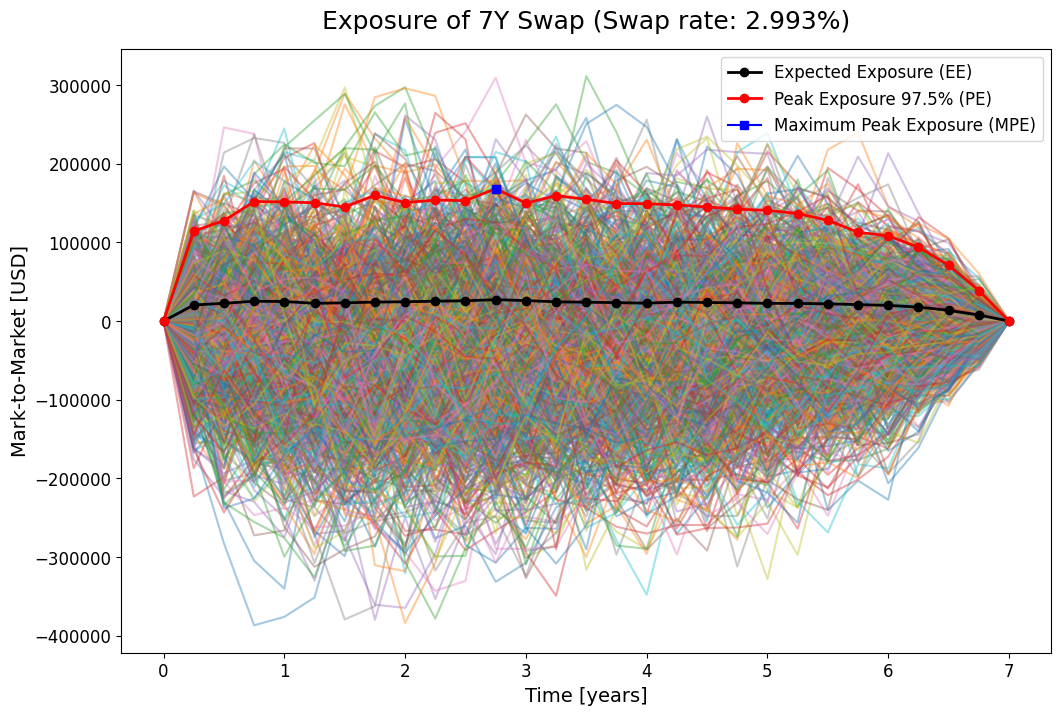

In [77]:
# Make an array for the time grid
maturity = 7
stepSize = 0.25

timeGrid = np.linspace(0,maturity,int(maturity/stepSize + 1))

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=(12,8), dpi=100)
plt.plot(timeGrid, swapMtM7Y, alpha=0.4)
plt.plot(timeGrid, swapEE7Y, color = 'black', linewidth = 2, linestyle = '-', marker='o', label = "Expected Exposure (EE)")
plt.plot(timeGrid, swapPE7Y, color = 'red', linewidth = 2, linestyle = '-', marker='o', label = "Peak Exposure {}% (PE)".format(round(quantileNumber*100, 1)))
plt.plot(index7Y, swapMax7Y, color = 'blue', marker = "s", label = "Maximum Peak Exposure (MPE)")
plt.xlabel('Time [years]')
plt.ylabel("Mark-to-Market [USD]")
plt.title(r'Exposure of {}Y Swap (Swap rate: {}%)'.format(maturity, round(FixedForFloat7Y.swapRate*100,3)), y=1.02)
plt.legend()
plt.show()

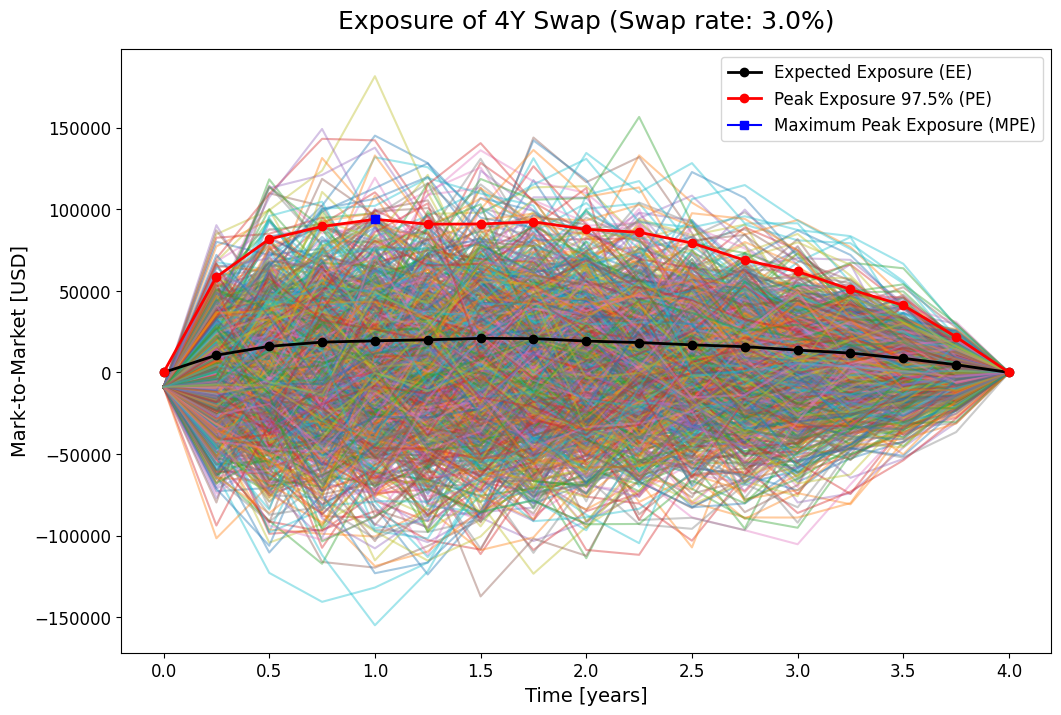

In [78]:
# Make an array for the time grid
maturity = 4
stepSize = 0.25

timeGrid = np.linspace(0,maturity,int(maturity/stepSize + 1))

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.figure(figsize=(12,8), dpi=100)
plt.plot(timeGrid, swapMtM4Y, alpha=0.4)
plt.plot(timeGrid, swapEE4Y, color = 'black', linewidth = 2, linestyle = '-', marker='o', label = "Expected Exposure (EE)")
plt.plot(timeGrid, swapPE4Y, color = 'red', linewidth = 2, linestyle = '-', marker='o', label = "Peak Exposure {}% (PE)".format(round(quantileNumber*100, 1)))
plt.plot(index4Y, swapMax4Y, color = 'blue', marker = "s", label = "Maximum Peak Exposure (MPE)")
plt.xlabel('Time [years]')
plt.ylabel("Mark-to-Market [USD]")
plt.title(r'Exposure of {}Y Swap (Swap rate: {}%)'.format(maturity, round(FixedForFloat4Y.swapRate*100,3)), y=1.02)
plt.legend()
plt.show()

### Calculating of Credit Value Adjustments (CVA)

Now we have found the expected exposure for all the contracts, we want to calculate the CVA of each contract. We start by finding the hazard rate in each case.

In [275]:
# Recovery rate for the counterpart
R = 0.62
bpsToPercentage = 10000

# Spreads for various maturities
tenor = [1,2,3,4,5,10]
bpsDate1 = [362,404,412,403,416,423]
bpsDate2 = [836,713,654,599,555,522]

# Find average default intensity 
avgIntensityDate1 = [bpsDate1[i]/(bpsToPercentage*(1 - R)) for i in range(len(bpsDate1))]
avgIntensityDate2 = [bpsDate2[i]/(bpsToPercentage*(1 - R)) for i in range(len(bpsDate2))]

# Spreads for various maturities
tenorMS = [0.5,1,2,3,4,5,7,10,20,30]
bpsMS = [19.04, 27.79, 38.62, 52.07, 63.73, 78.30, 100.51, 119.08, 144.48, 151.93]
avgIntensityMS = [bpsMS[i]/(bpsToPercentage*(1 - R)) for i in range(len(bpsMS))]

Recall that $\bar \lambda(t) = \frac{1}{t} \int_{0}^{t} \lambda(u)dt$. Then the cummulative probability of default $Q(t) = 1 - e^{-\bar \lambda(t) t}$. If spreads are not available for the exact dates, we need to calculate a piecewise linear function.

In [332]:
def piecewiseHazardRate(t, avgDates, avgIntensity):
    
    if t <= avgDates[0]:
        return avgIntensity[0]
    else:
        for i in range(1,len(avgDates)):      
            if  avgDates[i-1] < t and t <= avgDates[i]:
                return ((avgIntensity[i]*avgDates[i] - avgIntensity[i-1]*avgDates[i-1])/(avgDates[i] - avgDates[i-1]))
    
def PD(t1, t2, avgDates = bpsMS, avgIntensity = avgIntensityMS):
    
    if t2 < t1:
        print("The request does not make sense.")
        return(None)

    else:
        hazardRate1 = piecewiseHazardRate(t1, avgDates, avgIntensity)
        hazardRate2 = piecewiseHazardRate(t2, avgDates, avgIntensity)
        return(np.exp(-hazardRate1*t1) - np.exp(-hazardRate2*t2))
        

Then I will calculate the CVA.

In [353]:
stepSize = 0.25
maturity10 = 10
maturity7 = 7
maturity4 = 4

timeGrid10Y = np.linspace(0,maturity10,int(maturity10/stepSize + 1))
timeGrid7Y = np.linspace(0,maturity7,int(maturity7/stepSize + 1))
timeGrid4Y = np.linspace(0,maturity4,int(maturity4/stepSize + 1))

midwayTimeGrid10 = np.arange(stepSize,maturity10,2*stepSize)
midwayTimeGrid7 = np.arange(stepSize,maturity7,2*stepSize)
midwayTimeGrid4 = np.arange(stepSize,maturity4,2*stepSize)

selector10 = np.isin(timeGrid10Y, midwayTimeGrid10)
selector7 = np.isin(timeGrid7Y, midwayTimeGrid7)
selector4 = np.isin(timeGrid4Y, midwayTimeGrid4)

# Then we can find the exposure at these points
EE10 = swapEE10Y[selector10]
EE7 = swapEE7Y[selector7]
EE4 = swapEE4Y[selector4]

# Then we find the appropriate discount rates
DF = np.array([P(0, t, selectedData.iloc[-1], kappa, theta, sigma) for t in midwayTimeGrid10])

# Then we calculate the probability of default
endPointsGrid = timeGrid10Y[selector10 == False]
q = np.array([PD(endPointsGrid[i-1], endPointsGrid[i], avgDates = bpsDate1, avgIntensity = avgIntensityDate1) for i in range(1, len(endPointsGrid))])

# Then we find the CVA
CVA10_date1 = (1 - R) * np.sum(DF[:len(EE10)] * EE10 * q[:len(EE10)])
CVA7_date1 = (1 - R) * np.sum(DF[:len(EE7)] * EE7 * q[:len(EE7)])
CVA4_date1 = (1 - R) * np.sum(DF[:len(EE4)] * EE4 * q[:len(EE4)])

# Then we calculate the probability of default for the other date
endPointsGrid = timeGrid10Y[selector10 == False]
q = np.array([PD(endPointsGrid[i-1], endPointsGrid[i], avgDates = bpsDate2, avgIntensity = avgIntensityDate2) for i in range(1, len(endPointsGrid))])

# Then we find the CVA
CVA10_date2 = (1 - R) * np.sum(DF[:len(EE10)] * EE10 * q[:len(EE10)])
CVA7_date2 = (1 - R) * np.sum(DF[:len(EE7)] * EE7 * q[:len(EE7)])
CVA4_date2 = (1 - R) * np.sum(DF[:len(EE4)] * EE4 * q[:len(EE4)])


In [364]:
print(" "*18, "March 10", " "*10, "March 14")
print("CVA for 10Y: ", (CVA10_date1, CVA10_date2))
print("CVA for 7Y: ", (CVA7_date1, CVA7_date2))
print("CVA for 4Y: ", (CVA4_date1, CVA4_date2))

                   March 10            March 14
CVA for 10Y:  (20213.174608760262, 34274.57248610601)
CVA for 7Y:  (3814.290284094848, 6345.799984186665)
CVA for 4Y:  (1749.975159566932, 3294.2387526032026)
